---
# Projeto - Previsão de preço de imóveis no DF
---

#### **Machine Learning em Projetos (_Pablo Alves, Filipe Basílico e Carlos Roberto_)**


---
### **Descrição do projeto de machine learning**

Antes de escrever qualquer código, precisamos entender o problema que queremos resolver e fazer uma descrição eficiente do projeto, visando a comunicação simples e rápida do objetivo do projeto para técnicos, gestores e colaboradores.

**1- Nome do projeto (apelido)**

- Previsão de preço de imóveis no DF

**2- Descrição do problema ou tarefa:**

- Ao se deparar com um imóvel em um anúncio, confirmar se o seu preço é justo

**3- Descrição da solução de IA:**

- Treinamento supervisionado de modelo para realizar a previsão do valor de um imoóvel situada no Distrito Federal.

**4- Fonte de dados:**

- Webscraping de sites tipo olx, dfimoveis e similares.
- link: https://www.kaggle.com/datasets/devvret/brazil-real-estate-listings

**5- Base de dados/estrutura de dados:**

|#|Description| Field|Non-Null Count| Data type|X ou y|Drop
|-|-----------|:-----|:---------|:--------|:-------|:---|
| 0 ||Unnamed: 0|63 non-null|int64|-|*| 
| 1 ||created_on|63 non-null|object|-|*|
| 2 ||operation|63 non-null|object|-|*|
| 3 ||property_type|63 non-null|object|-|*|
| 4 ||place_name|63 non-null|object|-|*| 
| 5 ||place_with_parent_names|63 non-null|object|-|*| 
| 6 ||geonames_id|0 non-null|float64|-|*|
| 7 ||lat_lon|41 non-null|object|-|*|
| 8 ||lat|41 non-null|float64|-|*|
| 9 ||lon|41 non-null|float64|-|*|
| 10 ||price|63 non-null|float64|y|*|
| 11 ||currency|63 non-null|object|-|*|
| 12 ||price_aprox_local_currency|63 non-null|float64|X|*|
| 13 ||price_aprox_usd|63 non-null|float64|X||
| 14 ||surface_total_in_m2|16 non-null|float64|X|*|
| 15 ||surface_covered_in_m2|57 non-null|float64|X|*|
| 16 ||price_usd_per_m2|56 non-null|float64|X||
| 17 ||price_per_m2|56 non-null|float64|X||
| 18 ||floor|7 non-null|float64|X||
| 19 ||rooms|22 non-null|float64|X||
| 20 ||expenses|11 non-null|float64|-|*||
| 21 ||properati_url|63 non-null|object|-|*|
| 22 ||description|63 non-null|object|-|*|
| 24 ||image_thumbnail|63 non-null|object|-|*|
| 25 ||location|41 non-null|object|-|*|

- dtypes: float64(13), int64(1), object(12)


**6- Variáveis independentes (preditoras ou "features"):**

- Localização, metragem, quantidade de quartos, vagas de garagem e banheiros.

**6- Variável dependente (resposta ou "target"):**

- Preço do anúncio
---

Data: 10/05/2023

Autor

- Pablo Alves - TST - pablo.alves@tst.jus.br

Participante:

- Fillipe Ballico de Moraes - ORGAO - EMAIL
- Carlos Roberto - SSPAL - carlos.silva@pm.al.gov.br // tenroberto2011@gmail.com

---


### Carregar bibliotecas de código


In [1]:
# Importar bibliotecas (pandas etc)
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.model_selection import train_test_split

# importa o modelo de regressão linear, metrics, r2_score
# from sklearn.linear_model import LinearRegression,

from sklearn import metrics
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
# pd.set_option("display.float_format", lambda x: "%.3f" % x)

## 1- Análise exploratória do dados


### 1.1 Dados da base original

In [2]:
# Ler dados
arq_dados = "./dados/properati-BR-2016-11-01-properties-sell.csv"
dados = pd.read_csv(arq_dados, encoding='utf8')

# dados.to_csv("./dados/precos_br_2016.csv", index=False)

In [3]:
dados.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,2013-04-25,sell,apartment,Mondubim,|Brasil|Ceará|Fortaleza|Mondubim|,NaN,NaN,NaN,NaN,155900.0,BRL,155608.08,48648.81,NaN,NaN,NaN,NaN,NaN,2.0,NaN,http://mondubim.properati.com.br/px9_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Fortaleza,https://thumbs-cf.properati.com/8/EY670SQWML7c...
1,2013-04-25,sell,house,Manhuaçu,|Brasil|Minas Gerais|Manhuaçu|,NaN,NaN,NaN,NaN,950000.0,BRL,948221.29,296448.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://manhuacu.properati.com.br/pxv_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Manhuacu,https://thumbs-cf.properati.com/1/1VGQees9LIbx...
2,2013-04-25,sell,house,Ibatiba,|Brasil|Espírito Santo|Ibatiba|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://ibatiba.properati.com.br/pxw_vende-se_o...,"Otimo Imovel com o melhor valor da regiao, con...",Sítio Em Ibatiba,NaN
3,2013-04-25,sell,apartment,Manhuaçu,|Brasil|Minas Gerais|Manhuaçu|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://manhuacu.properati.com.br/pxy_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Manhuacu,NaN
4,2013-04-25,sell,apartment,Manhuaçu,|Brasil|Minas Gerais|Manhuaçu|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://manhuacu.properati.com.br/pxz_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Manhuacu,https://thumbs-cf.properati.com/2/UhPHI8dsNCb4...


In [4]:
dados.shape

(872672, 24)

In [ ]:
# dados.info()

In [5]:
dados.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')

In [6]:
# apenas dados da imoveis em Brasília
# # dados_df = dados.loc[dados['place_with_parent_names'] == {'Brasil','Distrito Federal','Brasília','' }]
dados_df = dados.loc[dados["place_name"] == "Brasília"]
dados_df.to_csv("./dados/dados_df.csv")

In [10]:
dados_df.shape

(407, 24)

In [12]:
sub = dados_df[
    [
        "property_type",
        "place_name",
        "place_with_parent_names",
        "floor",
        "rooms",
        "expenses",
        "surface_covered_in_m2",
        "surface_total_in_m2",
        "price_per_m2",
        "price_usd_per_m2",
        "price_aprox_usd",
        "price_aprox_local_currency",
        "price_aprox_usd",
        "currency",
        "price",
    ]
]

In [13]:
sub.head()

,property_type,place_name,place_with_parent_names,floor,rooms,expenses,surface_covered_in_m2,surface_total_in_m2,price_per_m2,price_usd_per_m2,price_aprox_usd,price_aprox_local_currency,price_aprox_usd,currency,price
13400,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,1.000,NaN,34.000,NaN,11417.471,3654.526,124253.880,397438.460,124253.880,BRL,388194.000
13401,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,1.000,NaN,87.000,NaN,8462.069,2708.555,235644.320,753731.920,235644.320,BRL,736200.000
13402,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,3.000,NaN,96.000,NaN,8380.125,2682.327,257503.360,823650.240,257503.360,BRL,804492.000
13403,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,2.000,NaN,62.000,NaN,4632.726,1482.852,91936.810,294069.080,91936.810,BRL,287229.000
13404,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,3.000,NaN,127.000,NaN,9259.843,2963.908,376416.360,1204005.360,376416.360,BRL,1176000.000


In [15]:
# Função para checar o dataset e ajustar pelos tipos
def check_df(dataframe, head=10):
    print(
        "############################################## SHAPE #############################################"
    )
    print(dataframe.shape)
    print(
        "############################################## Types #############################################"
    )
    print(dataframe.dtypes)
    print(
        "############################################# # Head #############################################"
    )
    print(dataframe.head(head))
    print(
        "############################################## Tail ##############################################"
    )
    print(dataframe.tail(head))
    print(
        "############################################# NA #################################################"
    )
    print(dataframe.isnull().sum())
    print(
        "########################################## Quantiles ############################################# "
    )
    print(dataframe.quantile([]).T)
    print(
        "##########################################  NUMBERUNIQE ########################################## "
    )
    print(dataframe.nunique())

In [22]:
check_df(sub)

############################################## SHAPE #############################################
(407, 15)
############################################## Types #############################################
property_type                  object
place_name                     object
place_with_parent_names        object
floor                         float64
rooms                         float64
expenses                      float64
surface_covered_in_m2         float64
surface_total_in_m2           float64
price_per_m2                  float64
price_usd_per_m2              float64
price_aprox_usd               float64
price_aprox_local_currency    float64
price_aprox_usd               float64
currency                       object
price                         float64
dtype: object
############################################# # Head #############################################
      property_type place_name             place_with_parent_names  floor   
13400     apartment   Brasília  

In [32]:
# def grab_col_names(dataframe, cat_th=7, car_th=20):
#     # cat_cols, cat_but_car
#     cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
#     num_but_cat = [
#         col
#         for col in dataframe.columns
#         if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"
#     ]
#     cat_but_car = [
#         col
#         for col in dataframe.columns
#         if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"
#     ]
#     cat_cols = cat_cols + num_but_cat
#     cat_cols = [col for col in cat_cols if col not in cat_but_car]

#     # num_cols
#     num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
#     num_cols = [col for col in num_cols if col not in num_but_cat]

#     print(f"Observations: {dataframe.shape[0]}")
#     print(f"Variables: {dataframe.shape[1]}")
#     print(f"cat_cols: {len(cat_cols)}")
#     print(f"num_cols: {len(num_cols)}")
#     print(f"cat_but_car: {len(cat_but_car)}")
#     print(f"num_but_cat: {len(num_but_cat)}")
#     return cat_cols, num_cols, cat_but_car

In [ ]:
# cat_cols, num_cols, cat_but_car = grab_col_names(sub)

In [25]:
# Analisar dimensões do dataset
df = pd.DataFrame(sub, columns=sub.columns)
df.head()
# df.to_csv("dados_df.txt")

,property_type,place_name,place_with_parent_names,floor,rooms,expenses,surface_covered_in_m2,surface_total_in_m2,price_per_m2,price_usd_per_m2,price_aprox_usd,price_aprox_local_currency,price_aprox_usd,currency,price
13400,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,1.000,NaN,34.000,NaN,11417.471,3654.526,124253.880,397438.460,124253.880,BRL,388194.000
13401,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,1.000,NaN,87.000,NaN,8462.069,2708.555,235644.320,753731.920,235644.320,BRL,736200.000
13402,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,3.000,NaN,96.000,NaN,8380.125,2682.327,257503.360,823650.240,257503.360,BRL,804492.000
13403,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,2.000,NaN,62.000,NaN,4632.726,1482.852,91936.810,294069.080,91936.810,BRL,287229.000
13404,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,3.000,NaN,127.000,NaN,9259.843,2963.908,376416.360,1204005.360,376416.360,BRL,1176000.000


In [44]:
# Verifica o total de valores nulos no dataset
df.isnull().sum()

property_type                   0
place_name                      0
place_with_parent_names         0
floor                         392
rooms                         252
expenses                      394
surface_covered_in_m2          65
surface_total_in_m2           275
price_per_m2                   81
price_usd_per_m2               81
price_aprox_usd                 6
price_aprox_local_currency      6
price_aprox_usd                 6
currency                        8
price                           6
dtype: int64

In [43]:
df.describe()

,floor,rooms,expenses,surface_covered_in_m2,surface_total_in_m2,price_per_m2,price_usd_per_m2,price_aprox_usd,price_aprox_local_currency,price_aprox_usd,price
count,15.000,155.000,13.000,342.000,132.000,326.000,326.000,401.000,401.000,401.000,401.000
mean,4.600,2.374,401.154,379.924,216.030,23784.258,7509.128,314381.064,1005579.268,314381.064,998155.252
std,2.586,1.196,252.456,1803.717,467.535,207937.039,65632.406,353130.723,1129523.930,353130.723,1121471.203
min,1.000,1.000,150.000,0.000,0.000,27.329,8.528,0.000,0.000,0.000,0.000
25%,2.000,1.000,200.000,51.250,0.000,4316.092,1354.672,98823.690,316097.450,98823.690,310000.000
50%,6.000,2.000,360.000,84.000,67.500,5559.550,1757.549,184110.340,588895.330,184110.340,590000.000
75%,6.000,3.000,500.000,204.000,170.000,8892.857,2815.876,400102.420,1279767.600,400102.420,1250000.000
max,9.000,6.000,1000.000,21201.000,2500.000,3000000.000,946909.915,2525093.110,8076762.820,2525093.110,8000000.000


In [39]:
# Lista as variáveis independentes ("features")
df.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'floor',
       'rooms', 'expenses', 'surface_covered_in_m2', 'surface_total_in_m2',
       'price_per_m2', 'price_usd_per_m2', 'price_aprox_usd',
       'price_aprox_local_currency', 'price_aprox_usd', 'currency', 'price'],
      dtype='object')

In [ ]:
# df_corr = df.corr('callable')
# df_corr

[Text(0.5, 1.0, 'Quantidade de quartos (rooms) x Valor do imóvel (price) x.1e6')]

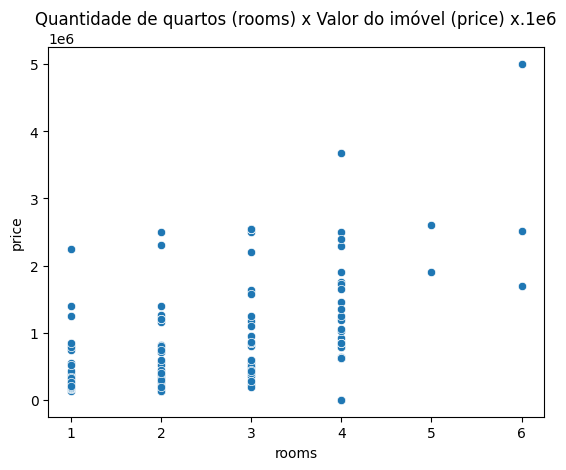

In [48]:
sns.scatterplot(x=df.rooms, y=df.price).set(
    title="Quantidade de quartos (rooms) x Valor do imóvel (price) x.1e6"
)

[Text(0.5, 1.0, 'Imóveis por intervalo de quartos')]

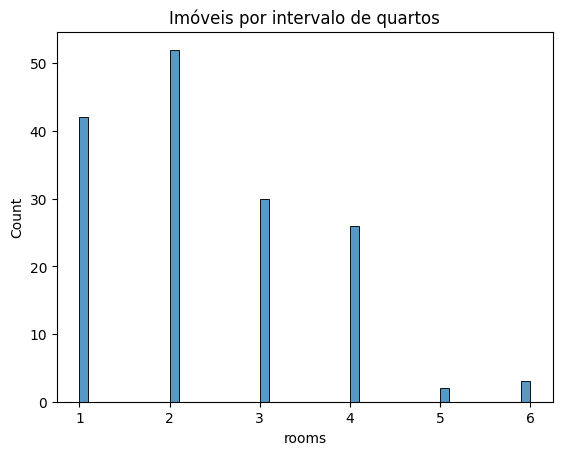

In [51]:
sns.histplot(data=df, x="rooms", bins=50).set(title="Imóveis por intervalo de quartos")

In [ ]:
sns.histplot(data=df, x="price", bins=800000).set(
    title="Imóveis por intervalo de preço"
)

### 1.2 dados da base preparada com os dados de DF 

In [4]:
# Ler dados
arq_dados = "./dados/dados_df.csv"
dados = pd.read_csv(arq_dados)

# dados.to_csv("./dados/precos_br_2016.csv", index=False)

In [6]:
dados.head()

,Unnamed: 0,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,13400,2014-01-09,sell,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,"-15.7942287,-47.8821658",-15.794229,-47.882166,388194.0,BRL,397438.46,124253.88,NaN,34.0,3654.525882,11417.470588,NaN,1.0,NaN,http://brasilia-distrito-federal.properati.com...,APARTAMENTO DE 1 QUARTO NOROESTE - ATRIUM PLAT...,ATRIUM PLATINE NOROESTE-APARTAMENTO DE 1 QUARTO,https://thumbs-cf.properati.com/2/C5v3t9lgl1Wn...
1,13401,2014-01-09,sell,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,"-15.7942287,-47.8821658",-15.794229,-47.882166,736200.0,BRL,753731.92,235644.32,NaN,87.0,2708.555402,8462.068966,NaN,1.0,NaN,http://brasilia-distrito-federal.properati.com...,EMPREENDIMENTO: - Atrium D'Argent. Excelente ...,COBERTURA DUPLEX 1 QUARTO NOROESTE - Atrium D'...,https://thumbs-cf.properati.com/3/xGvaV9zPuh9Z...
2,13402,2014-01-09,sell,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,"-15.7942287,-47.8821658",-15.794229,-47.882166,804492.0,BRL,823650.24,257503.36,NaN,96.0,2682.326667,8380.125000,NaN,3.0,NaN,http://brasilia-distrito-federal.properati.com...,Bossa Nova Noroeste. Conheça excelente Apartam...,BOSSA NOVA NOROESTE-APARTAMENTO 3 QUARTOS,https://thumbs-cf.properati.com/7/16jzon_13yOT...
3,13403,2014-01-09,sell,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,"-15.8729537,-48.0163953",-15.872954,-48.016395,287229.0,BRL,294069.08,91936.81,NaN,62.0,1482.851774,4632.725806,NaN,2.0,NaN,http://brasilia-distrito-federal.properati.com...,VIVACE SHOW DE MORAR TAGUATINGA-APARTAMENTO 2 ...,Vivace Show de Morar Taguatinga-Apartamento 2 ...,https://thumbs-cf.properati.com/8/brmgqVzyE3Gj...
4,13404,2014-01-09,sell,apartment,Brasília,|Brasil|Distrito Federal|Brasília|,NaN,"-15.7941454,-47.8825479",-15.794145,-47.882548,1176000.0,BRL,1204005.36,376416.36,NaN,127.0,2963.908346,9259.842520,NaN,3.0,NaN,http://brasilia-distrito-federal.properati.com...,PIGOT RESIDENCIAL: Conheça este excelente Apar...,APARTAMENTO 3 QUARTOS NOROESTE - Pigot Residen...,https://thumbs-cf.properati.com/1/oFTj_4cqx1Na...


In [27]:
dados_df = dados[
    [
        "floor",
        "rooms",
        "expenses",
        "surface_covered_in_m2",
        "surface_total_in_m2",
        "price_per_m2",
        "price_usd_per_m2",
        "price_aprox_usd",
        "price_aprox_local_currency",
        "price",
    ]
]

In [28]:
dados_df.head()

,floor,rooms,expenses,surface_covered_in_m2,surface_total_in_m2,price_per_m2,price_usd_per_m2,price_aprox_usd,price_aprox_local_currency,price
0,NaN,1.0,NaN,34.0,NaN,11417.470588,3654.525882,124253.88,397438.46,388194.0
1,NaN,1.0,NaN,87.0,NaN,8462.068966,2708.555402,235644.32,753731.92,736200.0
2,NaN,3.0,NaN,96.0,NaN,8380.125000,2682.326667,257503.36,823650.24,804492.0
3,NaN,2.0,NaN,62.0,NaN,4632.725806,1482.851774,91936.81,294069.08,287229.0
4,NaN,3.0,NaN,127.0,NaN,9259.842520,2963.908346,376416.36,1204005.36,1176000.0


In [29]:
# Analisar dimensões do dataset
df = pd.DataFrame(dados_df, columns=dados_df.columns)
df.head()

,floor,rooms,expenses,surface_covered_in_m2,surface_total_in_m2,price_per_m2,price_usd_per_m2,price_aprox_usd,price_aprox_local_currency,price
0,NaN,1.0,NaN,34.0,NaN,11417.470588,3654.525882,124253.88,397438.46,388194.0
1,NaN,1.0,NaN,87.0,NaN,8462.068966,2708.555402,235644.32,753731.92,736200.0
2,NaN,3.0,NaN,96.0,NaN,8380.125000,2682.326667,257503.36,823650.24,804492.0
3,NaN,2.0,NaN,62.0,NaN,4632.725806,1482.851774,91936.81,294069.08,287229.0
4,NaN,3.0,NaN,127.0,NaN,9259.842520,2963.908346,376416.36,1204005.36,1176000.0


In [30]:
df.isnull().sum()

floor                         392
rooms                         252
expenses                      394
surface_covered_in_m2          65
surface_total_in_m2           275
price_per_m2                   81
price_usd_per_m2               81
price_aprox_usd                 6
price_aprox_local_currency      6
price                           6
dtype: int64

In [31]:
# Mostrar informações do dataframe (.info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   floor                       15 non-null     float64
 1   rooms                       155 non-null    float64
 2   expenses                    13 non-null     float64
 3   surface_covered_in_m2       342 non-null    float64
 4   surface_total_in_m2         132 non-null    float64
 5   price_per_m2                326 non-null    float64
 6   price_usd_per_m2            326 non-null    float64
 7   price_aprox_usd             401 non-null    float64
 8   price_aprox_local_currency  401 non-null    float64
 9   price                       401 non-null    float64
dtypes: float64(10)
memory usage: 31.9 KB


In [32]:
df.describe()

,floor,rooms,expenses,surface_covered_in_m2,surface_total_in_m2,price_per_m2,price_usd_per_m2,price_aprox_usd,price_aprox_local_currency,price
count,15.000000,155.000000,13.000000,342.000000,132.000000,3.260000e+02,326.000000,4.010000e+02,4.010000e+02,4.010000e+02
mean,4.600000,2.374194,401.153846,379.923977,216.030303,2.378426e+04,7509.128163,3.143811e+05,1.005579e+06,9.981553e+05
std,2.585675,1.196035,252.455886,1803.717281,467.534510,2.079370e+05,65632.405626,3.531307e+05,1.129524e+06,1.121471e+06
min,1.000000,1.000000,150.000000,0.000000,0.000000,2.732916e+01,8.528102,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000,1.000000,200.000000,51.250000,0.000000,4.316092e+03,1354.671986,9.882369e+04,3.160975e+05,3.100000e+05
50%,6.000000,2.000000,360.000000,84.000000,67.500000,5.559550e+03,1757.549198,1.841103e+05,5.888953e+05,5.900000e+05
75%,6.000000,3.000000,500.000000,204.000000,170.000000,8.892857e+03,2815.875797,4.001024e+05,1.279768e+06,1.250000e+06
max,9.000000,6.000000,1000.000000,21201.000000,2500.000000,3.000000e+06,946909.915000,2.525093e+06,8.076763e+06,8.000000e+06


In [33]:
# Lista as variáveis independentes ("features")
df.columns

Index(['floor', 'rooms', 'expenses', 'surface_covered_in_m2',
       'surface_total_in_m2', 'price_per_m2', 'price_usd_per_m2',
       'price_aprox_usd', 'price_aprox_local_currency', 'price'],
      dtype='object')

In [34]:
df_corr = df.corr()
df_corr

,floor,rooms,expenses,surface_covered_in_m2,surface_total_in_m2,price_per_m2,price_usd_per_m2,price_aprox_usd,price_aprox_local_currency,price
floor,1.000000,-0.024342,NaN,0.321964,1.000000,0.324053,0.324053,0.217222,0.217222,0.217222
rooms,-0.024342,1.000000,-0.442985,0.541624,0.637968,-0.097973,-0.098628,0.570889,0.570889,0.569203
expenses,NaN,-0.442985,1.000000,-0.337326,NaN,0.580045,0.580045,-0.135369,-0.135369,-0.135369
surface_covered_in_m2,0.321964,0.541624,-0.337326,1.000000,-0.040410,-0.022021,-0.022032,0.132428,0.132428,0.132922
surface_total_in_m2,1.000000,0.637968,NaN,-0.040410,1.000000,-0.323306,-0.323938,0.312393,0.312393,0.314946
price_per_m2,0.324053,-0.097973,0.580045,-0.022021,-0.323306,1.000000,1.000000,0.286822,0.286822,0.285927
price_usd_per_m2,0.324053,-0.098628,0.580045,-0.022032,-0.323938,1.000000,1.000000,0.286769,0.286769,0.285871
price_aprox_usd,0.217222,0.570889,-0.135369,0.132428,0.312393,0.286822,0.286769,1.000000,1.000000,0.999953
price_aprox_local_currency,0.217222,0.570889,-0.135369,0.132428,0.312393,0.286822,0.286769,1.000000,1.000000,0.999953
price,0.217222,0.569203,-0.135369,0.132922,0.314946,0.285927,0.285871,0.999953,0.999953,1.000000


[Text(0.5, 1.0, 'Quantidade de quartos x Valor do imóvel')]

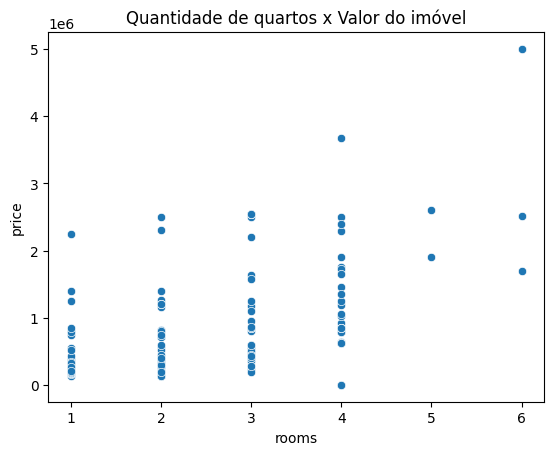

In [35]:
sns.scatterplot(x=df.rooms, y=df.price).set(
    title="Quantidade de quartos x Valor do imóvel"
)

[Text(0.5, 1.0, 'Imóveis por intervalo de preço')]

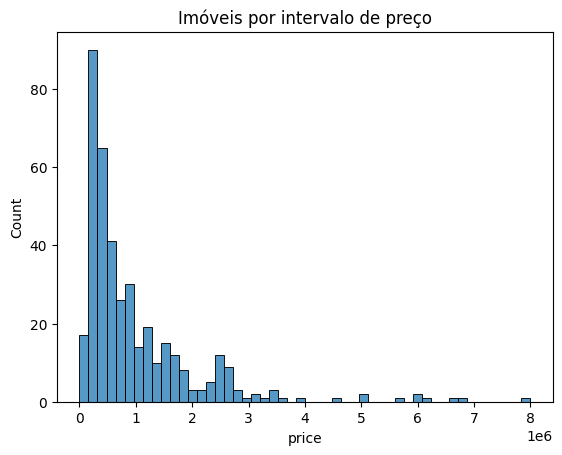

In [36]:
sns.histplot(data=df, x="price", bins=50).set(title="Imóveis por intervalo de preço")

<Axes: >

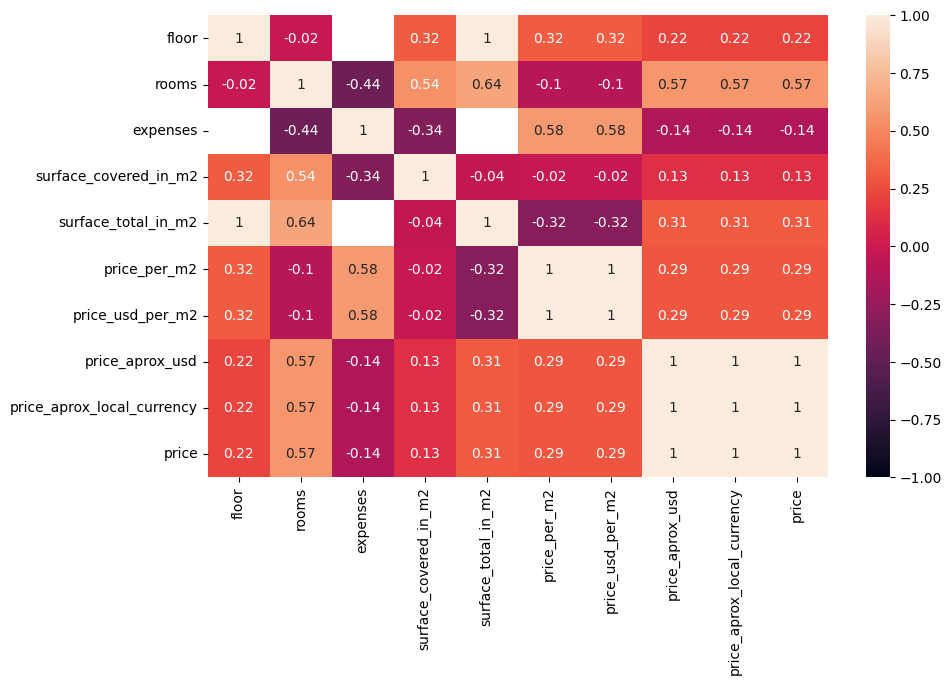

In [37]:
# Mostrar mapa de calor (heatmap) da matriz de correlação de todas as variáveis
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_corr.round(2), annot=True, vmin=-1, vmax=1)

In [38]:
# listar as correlações com a variável price (target)
df_corr.price[:-1].sort_values(ascending=False)

price_aprox_local_currency    0.999953
price_aprox_usd               0.999953
rooms                         0.569203
surface_total_in_m2           0.314946
price_per_m2                  0.285927
price_usd_per_m2              0.285871
floor                         0.217222
surface_covered_in_m2         0.132922
expenses                     -0.135369
Name: price, dtype: float64

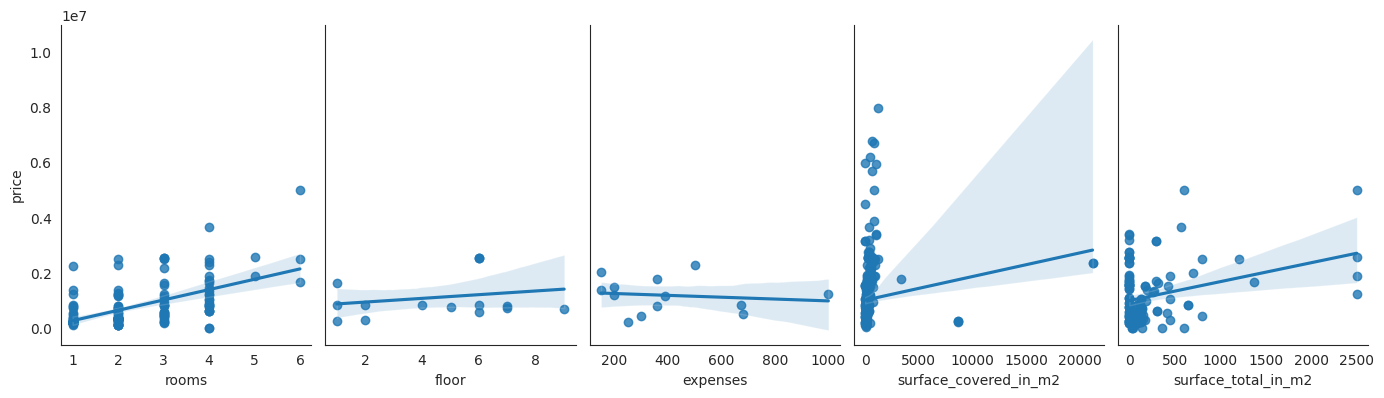

In [41]:
# Apresentar gráfico mostrando as relações entre as variáveis independentes e a dependente (vendas).
sns.set_style("white")
sns.pairplot(
    df,
    x_vars=[
        "rooms",
        "floor",
        "expenses",
        "surface_covered_in_m2",
        "surface_total_in_m2",
    ],
    y_vars="price",
    height=4,
    aspect=0.7,
    kind="reg",
)

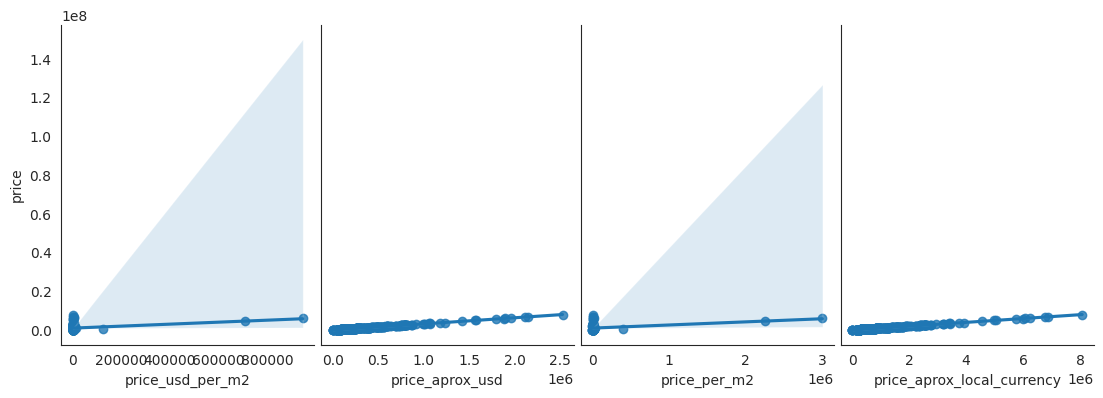

In [42]:
sns.pairplot(
    df,
    x_vars=[
        "price_usd_per_m2",
        "price_aprox_usd",
        "price_per_m2",
        "price_aprox_local_currency",
    ],
    y_vars="price",
    height=4,
    aspect=0.7,
    kind="reg",
)

## 2- Preparação dos dados


In [44]:
# atribuir os valores das variáveis independentes a 'X'
# Atribuir a X um subset do dataframe
X = df.drop(["price"], axis=1)

# select a Series from the DataFrame
y = df["price"]

print("X = ", X.shape)
print("y = ", y.shape)

X =  (407, 9)
y =  (407,)


In [45]:
# Divide o dataset em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_test = ", X_test.shape)
print("y_test = ", y_test.shape)

X_train =  (325, 9)
y_train =  (325,)
X_test =  (82, 9)
y_test =  (82,)


In [51]:
# normalizando
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
df_norm = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
df_norm.head()

,floor,rooms,expenses,surface_covered_in_m2,surface_total_in_m2,price_per_m2,price_usd_per_m2,price_aprox_usd,price_aprox_local_currency
0,NaN,-0.266886,NaN,-0.173616,NaN,-0.093225,-0.093252,-0.555892,-0.555892
1,NaN,NaN,NaN,0.290977,-0.460884,-0.101031,-0.100975,2.012198,2.012198
2,NaN,-0.266886,NaN,-0.153261,NaN,-0.095196,-0.095223,-0.419655,-0.419655
3,NaN,NaN,NaN,-0.170562,NaN,-0.074695,-0.074722,-0.263318,-0.263318
4,NaN,-1.122288,NaN,-0.190917,NaN,-0.074113,-0.074614,-0.586025,-0.586025


In [53]:
df_norm.describe()

,floor,rooms,expenses,surface_covered_in_m2,surface_total_in_m2,price_per_m2,price_usd_per_m2,price_aprox_usd,price_aprox_local_currency
count,1.100000e+01,1.250000e+02,9.000000e+00,2.680000e+02,1.020000e+02,2.570000e+02,2.570000e+02,3.200000e+02,3.200000e+02
mean,4.037175e-17,1.847411e-16,3.083953e-17,-6.628197e-18,2.612289e-17,1.727974e-17,-5.183921e-18,-3.053113e-17,-7.632783e-17
std,1.048809e+00,1.004024e+00,1.060660e+00,1.001871e+00,1.004938e+00,1.001951e+00,1.001951e+00,1.001566e+00,1.001566e+00
min,-1.139683e+00,-1.122288e+00,-1.260070e+00,-2.077095e-01,-4.608837e-01,-1.156951e-01,-1.157243e-01,-8.535400e-01,-8.535400e-01
25%,-9.553222e-01,-1.122288e+00,-6.744950e-01,-1.818846e-01,-4.608837e-01,-9.780346e-02,-9.778459e-02,-5.863135e-01,-5.863135e-01
50%,-3.352008e-02,-2.668855e-01,-3.231504e-01,-1.652193e-01,-3.139770e-01,-9.177211e-02,-9.146102e-02,-3.884657e-01,-3.884657e-01
75%,7.039216e-01,5.885168e-01,7.894411e-01,-9.308789e-02,-1.256604e-01,-7.860086e-02,-7.874540e-02,2.076895e-01,2.076895e-01
max,1.810084e+00,3.154724e+00,2.058186e+00,1.058071e+01,4.468871e+00,1.278813e+01,1.278813e+01,5.911177e+00,5.911177e+00


### 2.1- Codificação das variáveis independentes


#### 2.1.1- Pandas Get Dummies


In [ ]:
# df.head()

In [ ]:
# Codificando com get_dummies
# df_getdummies = pd.get_dummies(X_train)
# print('Dimensões do dataset com get_dummies: ', df_getdummies.shape)
# df_getdummies.head()

#### 2.1.2- One-hot encoder do Sklearn


In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# onehotenc = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# onehotenc.fit(X_train)

In [ ]:
# onehotenc.categories_

In [ ]:
# df_onehotenc = pd.DataFrame(onehotenc.fit_transform(X_train),columns=onehotenc.get_feature_names_out())
# print('Dimensões do dataset com sklearn onehotenc: ', df_onehotenc.shape)
# df_onehotenc.head()

#### 2.1.3- Ordinal Encoder


In [ ]:
# Codificando com OrdinalEncoder
# from sklearn.preprocessing import OrdinalEncoder
# ordenc = OrdinalEncoder()

In [ ]:
# df_ordenc = pd.DataFrame(ordenc.fit_transform(X_train))
# df_ordenc.head()

In [ ]:
df_ordenc.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
print("Dimensões do dataset com OrdinalEncoder: ", df_ordenc.shape)
df_ordenc.head()

Dimensões do dataset com OrdinalEncoder:  (1468, 6)


,buying,maint,doors,persons,lug_boot,safety
0,0.0,1.0,2.0,0.0,0.0,0.0
1,2.0,0.0,1.0,0.0,1.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,3.0,0.0,0.0,2.0
4,1.0,1.0,2.0,2.0,0.0,0.0


In [ ]:
ordenc.categories_

[array(['high', 'low', 'med', 'vhigh'], dtype=object),
 array(['high', 'low', 'med', 'vhigh'], dtype=object),
 array(['2', '3', '4', '5more'], dtype=object),
 array(['2', '4', 'more'], dtype=object),
 array(['big', 'med', 'small'], dtype=object),
 array(['high', 'low', 'med'], dtype=object)]

Conclusões sobre o Ordinal Encoder :

- O ordinal encoder utilizou a ordem lexicográfica para codificação dos valores das variáveis, resultando numa péssima conversão. Isto irá prejudicar o desempenho do modelo.  
  Por exemplo:  
  "safety" : high=0, low=1 e med=2.  
  o correto seria: low=0, med=1 e high=2.
- Sempre confira o resultado, principalmente, do Ordinal encoder!


#### 2.1.4- Manual Enconding


In [ ]:
# Mostra os valores únicos de cada variável para (fazer loop)
for col in df:
    print(col, ":", df[col].unique())

buying : ['vhigh' 'high' 'med' 'low']
maint : ['vhigh' 'high' 'med' 'low']
doors : ['2' '3' '4' '5more']
persons : ['2' '4' 'more']
lug_boot : ['small' 'med' 'big']
safety : ['low' 'med' 'high']
car : ['unacc' 'acc' 'vgood' 'good']


In [ ]:
# A ordem das categorias não foi respeitada no Ordinal encoder acima.
# Façamos um encoding manual, respeitando essas ordens relativas.
# Criar dicionário para codificar os dados das colunas com o comando replace
encoding = {
    "low": 0,
    "small": 0,
    "med": 1,
    "high": 2,
    "big": 2,
    "2": 0,
    "3": 1,
    "4": 2,
    "more": 3,
    "5more": 3,
    "vhigh": 3,
}

In [ ]:
dic_persons = {"2": 0, "4": 1, "more": 2}
df_manualenc = pd.DataFrame(X.persons.replace(dic_persons))

In [ ]:
# Mostre as primeiras linhas de X para poder visualizar a diferença quando executar o comando na célula abaixo
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [ ]:
# Criar um novo dataframe com a codificação do Manual encoding (usando replace) e mostrar as primeiras linhas e dimensões
df_manualenc = pd.DataFrame(X.replace(encoding))
df_manualenc.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,0,0
1,3,3,0,0,0,1
2,3,3,0,0,0,2
3,3,3,0,0,1,0
4,3,3,0,0,1,1


In [ ]:
# Dividir o dataset entre treino e teste

## 3 - Escolha do Modelo


### 3.1 - Modelo de regressão linear

## 4 - Treinar o modelo


In [55]:
# instancia modelo de regressão linear
reg_lin = LinearRegression()

# treina o modelo (aprende os coeficientes)

reg_lin.fit(X_train, y_train)
# Fazer a predição para os dados do dataset de teste
y_pred = reg_lin.predict(X_test)

print(
    "R2_score = ",
    r2_score(y_test, y_pred),
    "\n R2 Captou 75% da variabilidade dos seus dados de treinamento.",
)
# Cálculo do MSE usando o scikit-learn
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))
# Cálculo do MSE usando o scikit-learn
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
# Cálculo do RMSE usando o scikit-learn
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## 5- Testar o(s) modelo(s)


In [ ]:
# fazer predição da espécie para uma nova flor com as dimensões: [5.1, 3.5, 1.4, 0.2]

In [ ]:
# mostrar resultado da predição

## 6- Avaliar o modelo


In [ ]:
# mostrar score

In [ ]:
# mostrar matrix de confusão ou Curva ROC

## Conclusão

No nosso experimento, treinamos modelos de regressão logística sobre os dados de aceitabilidade de carros com diferentes codificações, gerando os seguintes resultados:

- pandas get_dummies: 90,3% (f1-score)
- one-hot encoding: 91,7% (f1-score)
- ordinal encoding (sem seguir a ordem das categorias): 61,5% (f1-score)
- manual encoding (substituição), seguindo a ordem relativa das categorias: 80,0% (f1-score)
